## EDA


In [35]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML


In [18]:


# Read the CSV file into a DataFrame
df = pd.read_csv("merged_3_files.csv")

# Display the DataFrame
df

,Age,gender,ethnicity,insurance,id,label,R78,I10,I82,L53,...,D16,S69,C03,N75,X79,F18,Z67,E25,W67,H62
0,55,F,WHITE,Other,30327812,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46,F,WHITE,Other,37542711,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68,F,BLACK/AFRICAN AMERICAN,Medicare,31832304,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,53,F,OTHER,Medicare,37106138,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80,F,WHITE,Other,34599502,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56332,71,F,BLACK/AFRICAN AMERICAN,Medicare,32553956,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
56333,42,M,OTHER,Other,35840543,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56334,41,M,WHITE,Medicaid,37569254,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56335,58,M,WHITE,Other,39944651,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,56337.0,6.369753e+01,1.647302e+01,18.0,54.0,65.0,76.0,91.0
id,56337.0,3.500444e+07,2.876853e+06,30000010.0,32527524.0,35004476.0,37492660.0,39998706.0
label,56337.0,1.734384e-01,3.786292e-01,0.0,0.0,0.0,0.0,1.0
R78,56337.0,7.231482e-02,2.590108e-01,0.0,0.0,0.0,0.0,1.0
I10,56337.0,3.792179e-01,4.851967e-01,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
F18,56337.0,1.775032e-05,4.213113e-03,0.0,0.0,0.0,0.0,1.0
Z67,56337.0,1.775032e-05,4.213113e-03,0.0,0.0,0.0,0.0,1.0
E25,56337.0,1.775032e-05,4.213113e-03,0.0,0.0,0.0,0.0,1.0
W67,56337.0,1.775032e-05,4.213113e-03,0.0,0.0,0.0,0.0,1.0


C:\Users\topsn\AppData\Local\Temp\ipykernel_18372\1269752338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


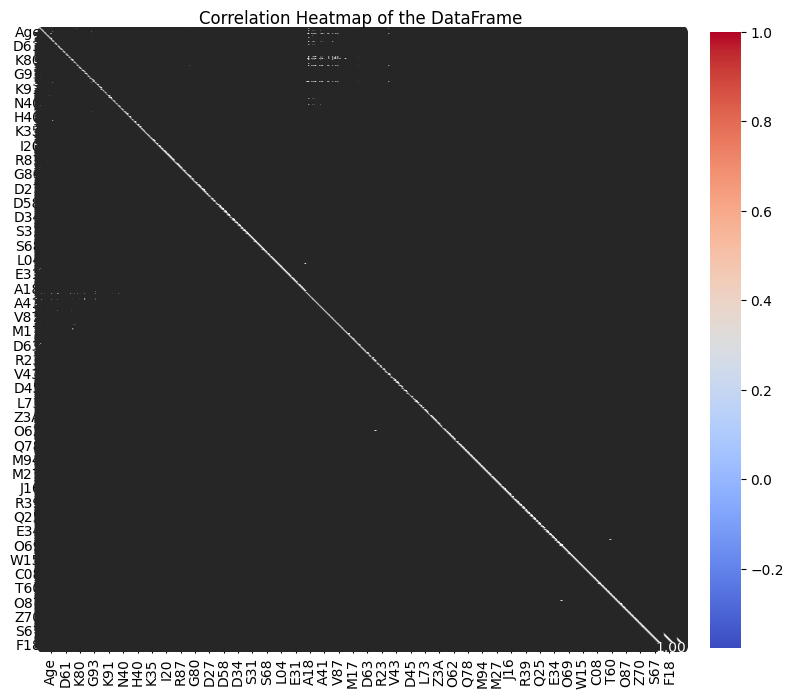

In [36]:
# # Calculate the correlation matrix
# correlation_matrix = df.corr()

# # Set up the Matplotlib figure
# plt.figure(figsize=(10, 8))

# # Create a heatmap using Seaborn
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# # Title for the plot
# plt.title('Correlation Heatmap of the DataFrame')

# # Show plot
# plt.show()

# RFE Feature Selection

In [21]:


# Separate your features and target variable
X = df.drop('id', axis=1)  # X contains the features
X = df.drop('label', axis=1)  # X contains the features
y = df['label']  # y is the target variable

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X)  # This will convert categorical columns to one-hot encoded columns

# Create an instance of the model you want to use for RFE
model = LinearRegression()

# Initialize RFE with the model and the number of features to select
num_features_to_select = 50  # You can set the number of features you want to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['A19', 'T30', 'J60', 'D02', 'Y33', 'V63', 'O12', 'O74', 'W50', 'X19',
       'T67', 'X30', 'V92', 'A93', 'E77', 'Y74', 'T60', 'H01', 'H27', 'X80',
       'X32', 'F89', 'W24', 'D71', 'B53', 'B46', 'V04', 'S28', 'T59', 'S57',
       'S67', 'W89', 'L56', 'C31', 'L10', 'N75', 'F18', 'gender_F', 'gender_M',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE', 'ethnicity_ASIAN',
       'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_HISPANIC/LATINO',
       'ethnicity_OTHER', 'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN',
       'ethnicity_WHITE', 'insurance_Medicaid', 'insurance_Medicare',
       'insurance_Other'],
      dtype='object')


In [22]:
# Create a new dataset with only the selected features
X_selected = X[selected_features]


,A19,T30,J60,D02,Y33,V63,O12,O74,W50,X19,...,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC/LATINO,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN,ethnicity_WHITE,insurance_Medicaid,insurance_Medicare,insurance_Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56332,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
56333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
56334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
56335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [30]:
selected_X = X[selected_features]

# Convert the target variable to categorical
y = y.astype('category')

# Initialize H2O
h2o.init()

# Convert selected features and target variable to H2OFrame
h2o_selected_X = h2o.H2OFrame(pd.concat([selected_X, y], axis=1))

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(y='label', training_frame=h2o_selected_X)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

Checking whether there is an H2O instance running at http://localhost:54321.

 connected.


H2O_cluster_uptime:,14 mins 54 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_topsn_lkdxby
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.469 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
13:12:03.209: AutoML: XGBoost is not available; skipping it.
13:12:03.211: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
13:12:04.170: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
13:12:05.695: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
13:12:08.931: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to tra

In [31]:
# Select the top model
top_model = aml.leader

# Retrieve details of the top model
model_details = h2o.get_model(top_model.model_id)

# View the top model details
print(model_details)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_3_20231101_131203


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 28                          8784                   6            6            6             10            30            20.0714

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1424291960892316
RMSE: 0.3773979280404592
MAE: 0.2855300370203809
RMSLE: 0.2646074816843006
Mean Residual Deviance: 0.1424291960892316

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.14284678162105283
RMSE: 0.3779507661337027
MAE: 0.2857840122714587
RMSLE: 0.26496404871788276
Mean Residual Deviance: 0.142846781

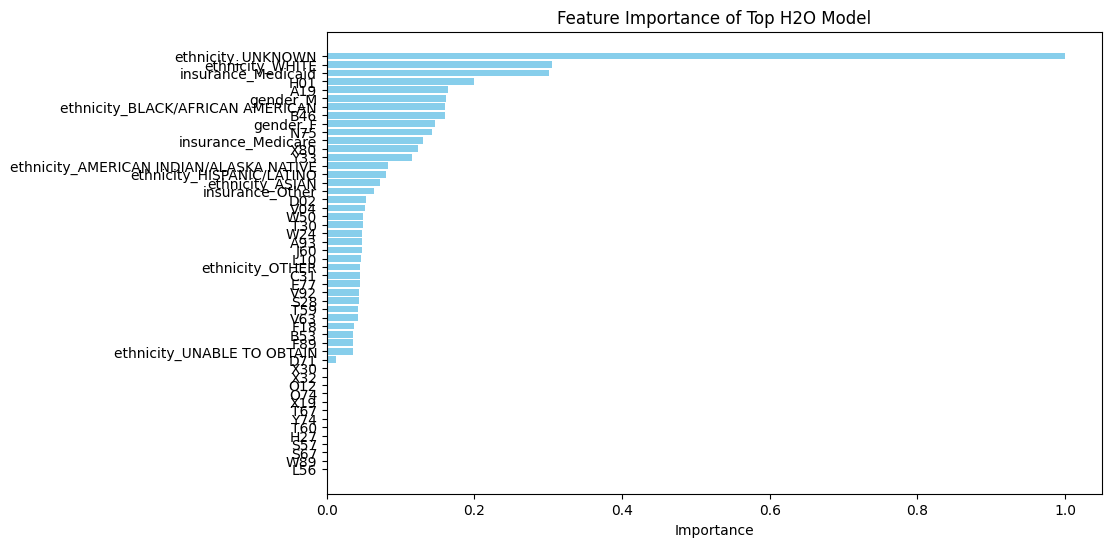

In [34]:
# Retrieve variable importance of the top model
feature_importance = top_model.varimp()

# Create lists of feature names and their respective importance values
feature_names = [item[0] for item in feature_importance]
importance_values = [item[2] for item in feature_importance]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance of Top H2O Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()